### Подключение библиотек и скриптов

In [193]:
import numpy as np
import pandas as pd

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Загрузка данных

**Описание датасета**
* **age** = Возраст человека (в годах)
* **sex** = Пол человека (1 = Мужчина; 0 = Женщина)
* **cp** = Тип боли в груди
   Значение 0: типичная стенокардия
   Значение 1: атипичная стенокардия
   Значение 2: неангинальная боль
   Значение 3: бессимптомно
* **trtbps** = Артериальное давление человека в состоянии покоя (мм рт.ст. при поступлении в больницу)
* **chol** = Измерение уровня холестерина у человека в мг/дл
* **fbs** = Уровень сахара в крови человека натощак (> 120 мг/дл, 1 = верно; 0 = ложно)
* **restecg** = результаты электрокардиографии в состоянии покоя
   Значение 0: показывает вероятную или определенную гипертрофию левого желудочка по критериям Эстеса
   Значение 1: норма
   Значение 2: наличие аномалии зубца ST-T (инверсии зубца T и/или повышение или понижение ST > 0,05 мВ)
* **thalachh** = максимальная частота сердечных сокращений
* **exng** = стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)
* **oldpeak** = Депрессия ST, вызванная физической нагрузкой относительно покоя ("ST’ относится к позициям на графике ЭКГ. Смотрите больше здесь)
* **slp** = Наклон пика упражнения сегмента ST
    Значение 0: наклон вверх
    Значение 1: плоский
    Значение 2: наклон вниз
* **caa** = количество крупных сосудов (всего их 5: верхняя и нижняя полые вены, легочная артерия, легочная вена и аорта)
* **thall** = Заболевание крови, называемое талассемией
    Значение 0: NULL (ранее удалено из набора данных
    Значение 1: исправлен дефект (отсутствие кровотока в некоторой части сердца)
    Значение 2: нормальный кровото
    Значение 3: обратимый дефект (кровоток наблюдается, но он не является нормальным)
* **target** = Целевая переменная ИЛИ диагноз заболевания сердца (ангиографический статус заболевания)

    Значение 0: сужение диаметра <50%
    Значение 1: сужение диаметра >50%

In [195]:
df = pd.read_csv("data_heart1.csv")
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


**Размер обучающего датасета**

In [196]:
df.shape

(303, 14)

**Количество и типы данных**

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trtbps      303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalachh    303 non-null int64
exng        303 non-null int64
oldpeak     303 non-null float64
slp         303 non-null int64
caa         303 non-null int64
thall       303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


###### все атрибуты имеют тип 'int', кроме атрибута oldpeak

**Обзор количественных признаков**

In [198]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##### В нашем датасете средний возраст -  54 года, минимальный возраст - 29 лет, максимальный возраст - 77 лет, 25 % людей в возрасте моложе  47 лет и 75 % людей в возрасте моложе 61 года

**Список всех столбцов, присутствующих в фрейме данных**

In [199]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'target'],
      dtype='object')

**проверим наличие пустых значения**

In [200]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
target      0
dtype: int64

###### в нашем датасете нет столбцов с пустыми значениями

**проверим количество уникальных значений в каждом столбце**

In [201]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
target        2
dtype: int64

**проверим датасет на дублирующиеся строки**

In [202]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


**удалим дублирующиеся строки**

In [203]:
df.drop_duplicates(keep='first',inplace=True)

**Целевая переменная**

In [204]:
target_name = 'target'

In [205]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

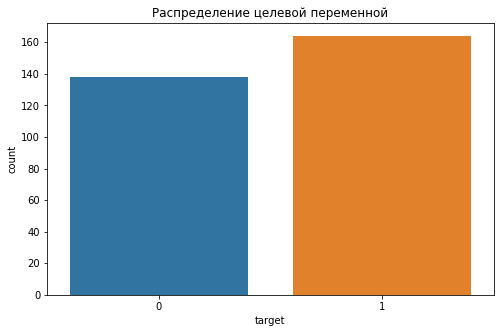

In [206]:
plt.figure(figsize=(8, 5))

sns.countplot(x=target_name, data=df)

plt.title('Распределение целевой переменной')
plt.show()

**проверим наш датасет на выборсы**

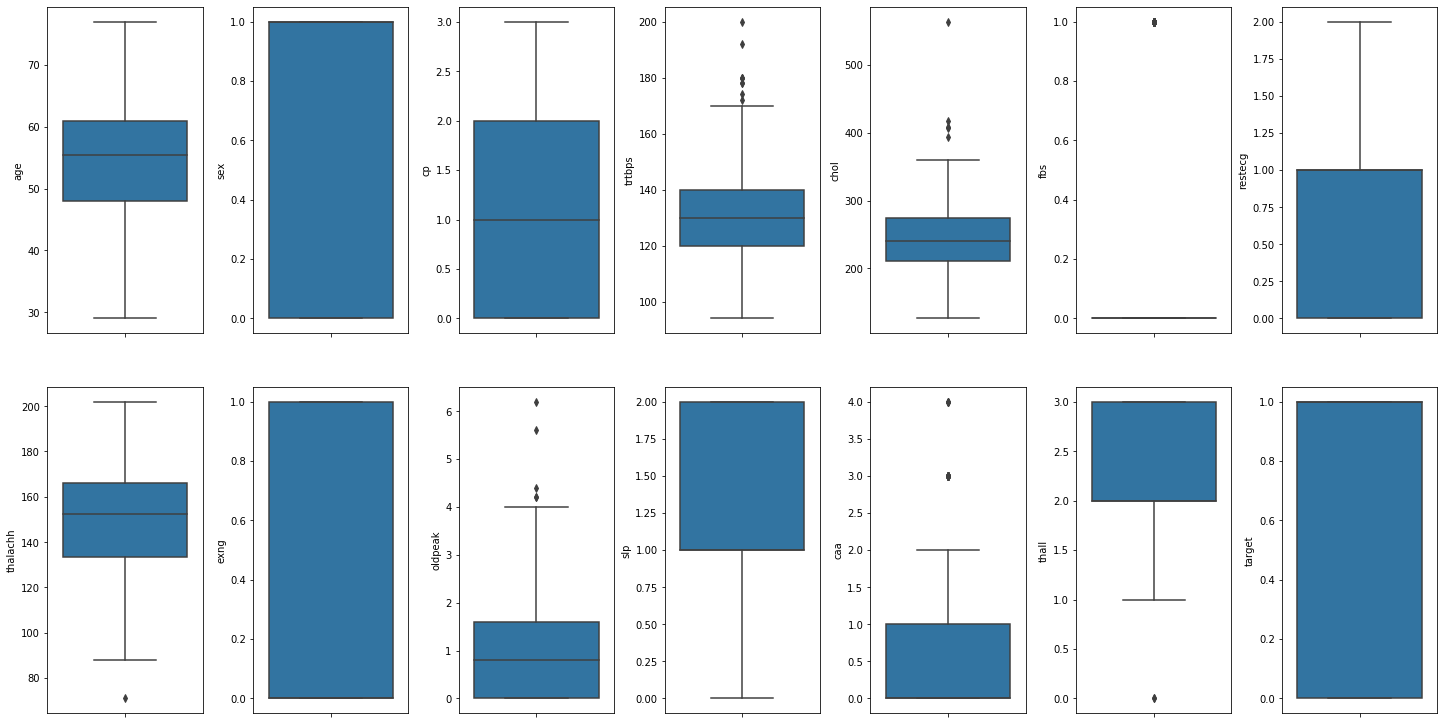

In [207]:
fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

##### посмотрим не соотношение мужчин и женщин в нашем датасете

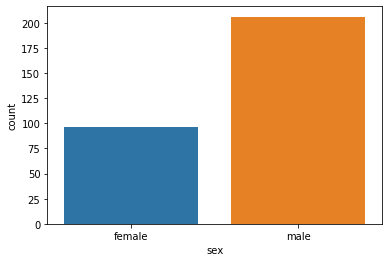

In [208]:
ax = sns.countplot(x = "sex",data= df, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["female", "male"])
plt.show()

**посмотрим на соотношение целевой переменной с полом**

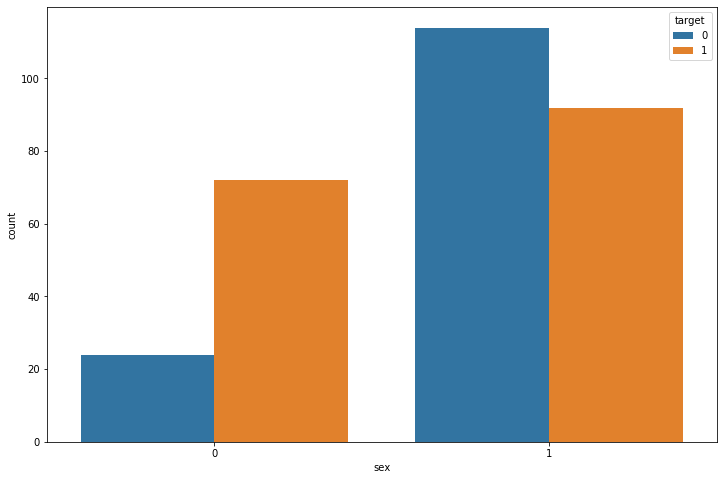

In [209]:
plt.figure(figsize=(12,8))
sns.countplot(x='sex', data=df, hue='target')
# here we see that there is a huge difference between the sexes in the risk of
# having a heart attack

##### у мужчин риск возникновени сердечно-сосудичтых заболеваний гораздо выше

**количественное соотношение признака CP (типов боли в груди)**

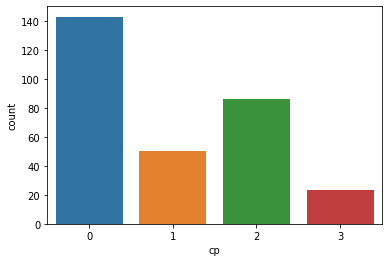

In [210]:
sns.countplot(data=df,x='cp')
plt.show()

**количественное соотношение признака FBS (повышенное содержание сахара в корови натощак)**

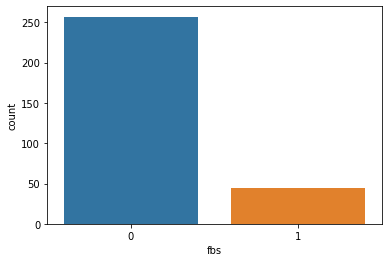

In [211]:
p = sns.countplot(data=df, x="fbs")
plt.show()

**соотношение признака FBS (повышенное содержание сахара в корови натощак)  с возрастом**

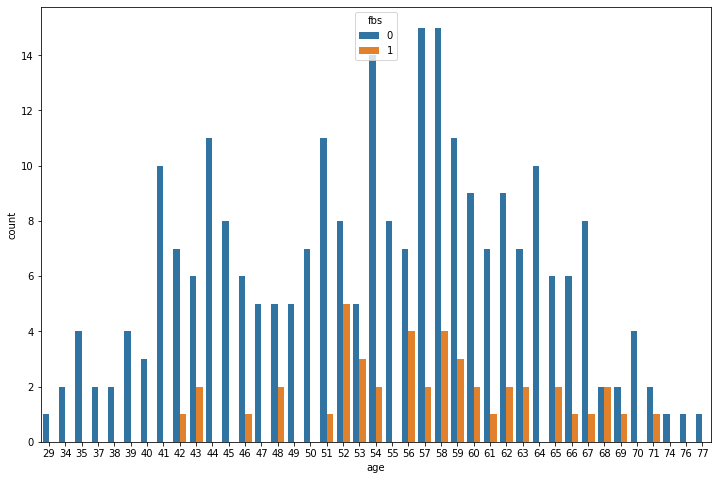

In [212]:
plt.figure(figsize=(12,8))
sns.countplot(x='age', data=df, hue='fbs')

##### после 40 лет наблюдается повышенное содержание сахара в крови натощак

##### количественное соотношение признака RESTECG  (результаты электрокардиокрафии в состоянии покоя)

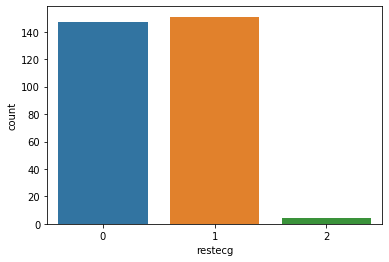

In [213]:
p = sns.countplot(data=df, x="restecg")
plt.show()

##### количественное соотношение признака EXNG (стенокардия, вызванная физической нагрузкой)

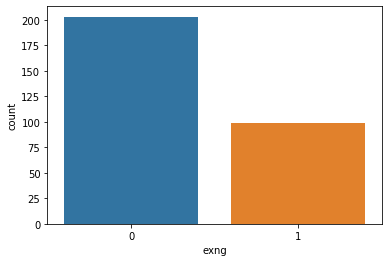

In [214]:
p = sns.countplot(data=df, x="exng")
plt.show()

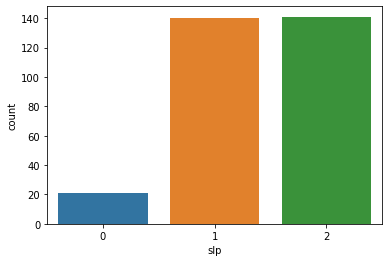

In [215]:
p = sns.countplot(data=df, x="slp")
plt.show()

##### количественное соотношение признака THALL  (заболевание крови, называемое талассемией)

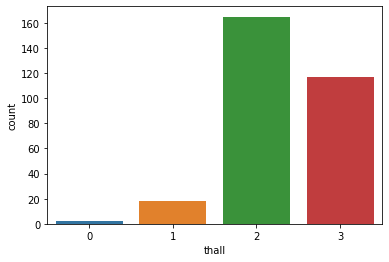

In [216]:
p = sns.countplot(data=df, x="thall")
plt.show()

##### количественное соотношение признака CAA  (количество пораженных крупных сосудов)

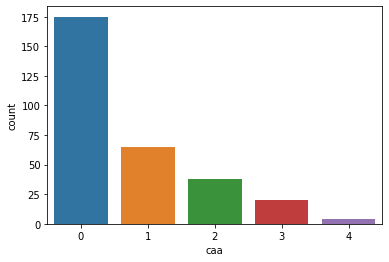

In [217]:
p = sns.countplot(data=df, x="caa")
plt.show()

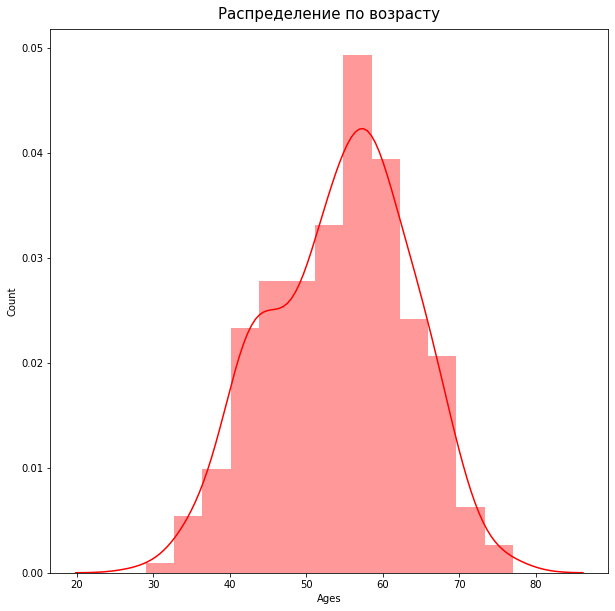

In [218]:
#distribution plot of age
plt.figure(figsize=(10,10))
sns.distplot(df['age'], color='red')
plt.title('Распределение по возрасту', fontsize=15, pad = 10)
plt.xlabel('Ages', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

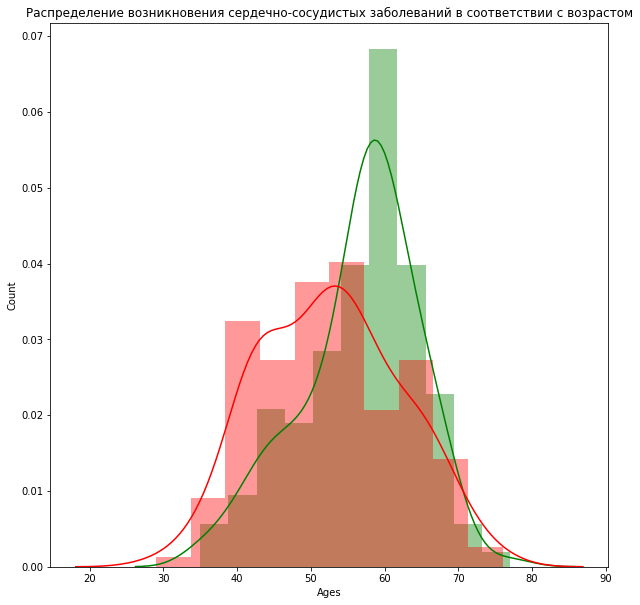

In [219]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['target'] == 0]["age"], color='green',kde=True,) 
sns.distplot(df[df['target'] == 1]["age"], color='red',kde=True)
plt.title('Распределение возникновения сердечно-сосудистых заболеваний в соответствии с возрастом')
plt.xlabel('Ages', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

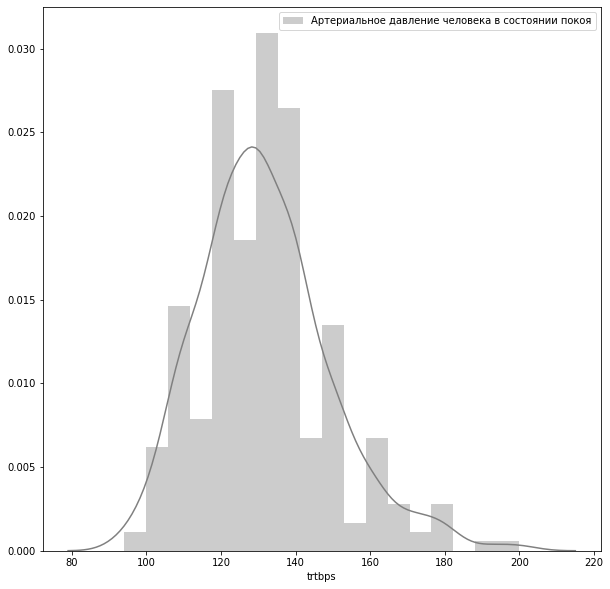

In [220]:
plt.figure(figsize=(10,10))
sns.distplot(df['trtbps'], color="gray", label="Артериальное давление человека в состоянии покоя", kde= True)
plt.legend()

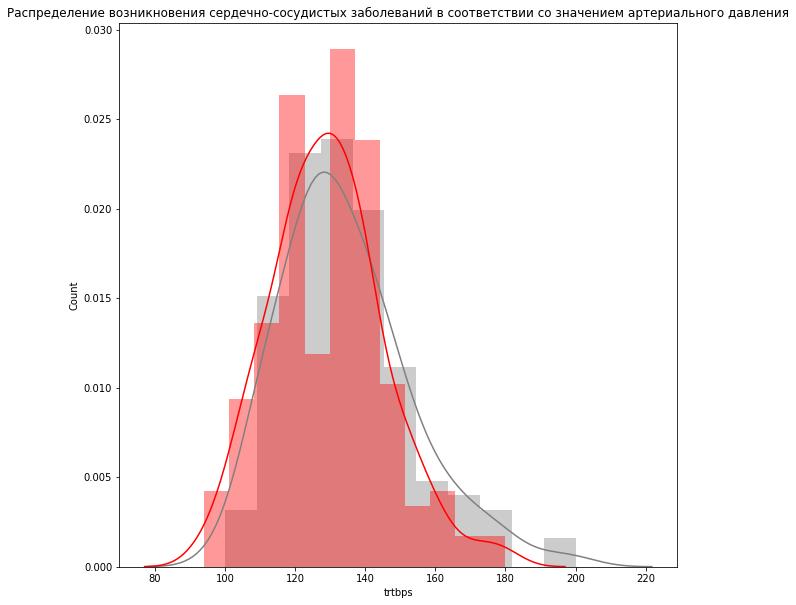

In [221]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['target'] == 0]["trtbps"], color='gray',kde=True,) 
sns.distplot(df[df['target'] == 1]["trtbps"], color='red',kde=True)
plt.title('Распределение возникновения сердечно-сосудистых заболеваний в соответствии со значением артериального давления')
plt.xlabel('trtbps', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

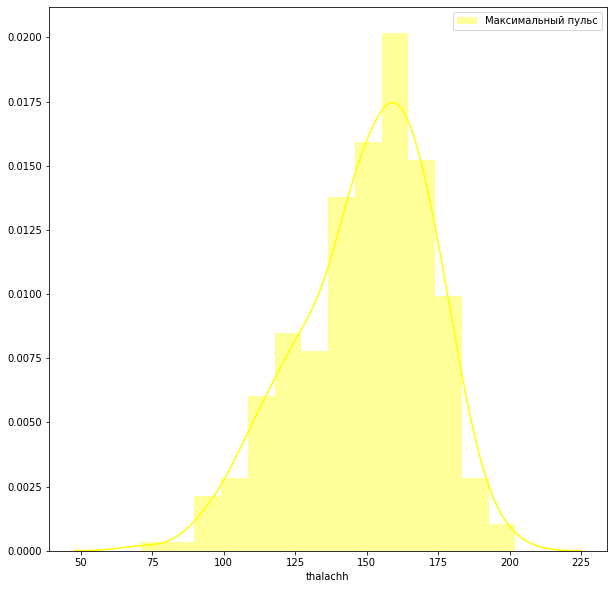

In [222]:
plt.figure(figsize=(10,10))
sns.distplot(df['thalachh'], color="yellow", label="Максимальный пульс", kde= True)
plt.legend()

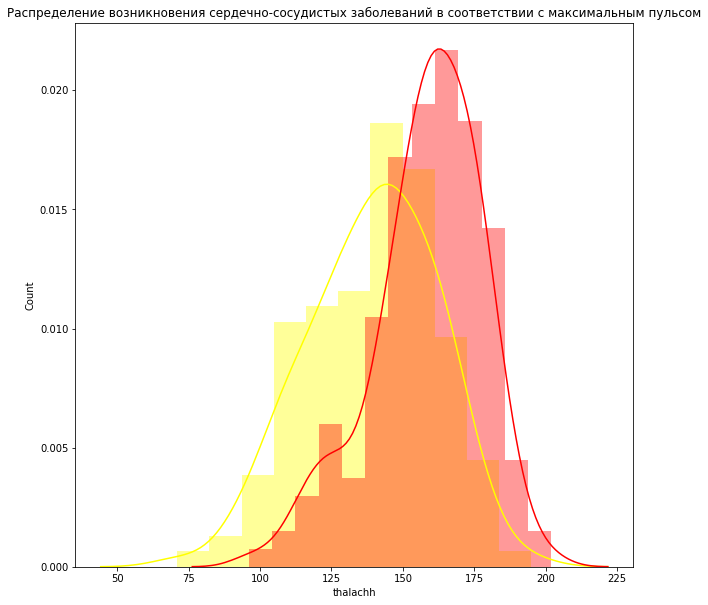

In [223]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['target'] == 0]["thalachh"], color='yellow',kde=True,) 
sns.distplot(df[df['target'] == 1]["thalachh"], color='red',kde=True)
plt.title('Распределение возникновения сердечно-сосудистых заболеваний в соответствии с максимальным пульсом')
plt.xlabel('thalachh', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

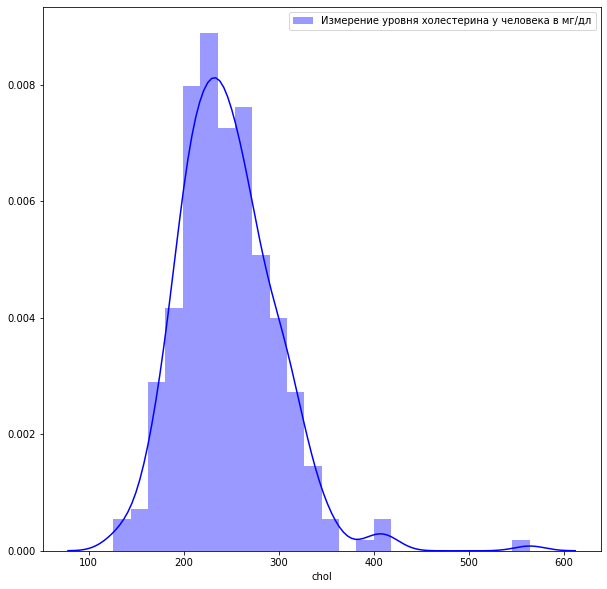

In [224]:
plt.figure(figsize=(10,10))
sns.distplot(df['chol'], color="blue", label="Измерение уровня холестерина у человека в мг/дл", kde= True)
plt.legend()

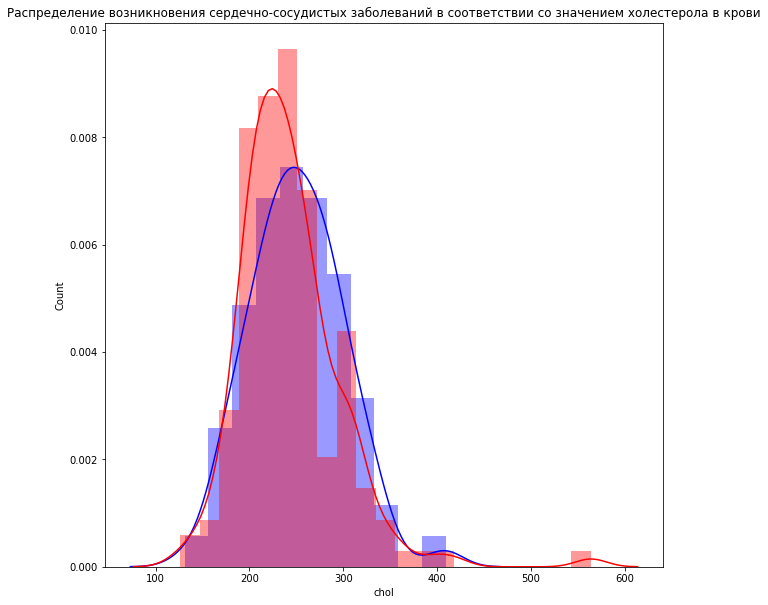

In [225]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['target'] == 0]["chol"], color='blue',kde=True,) 
sns.distplot(df[df['target'] == 1]["chol"], color='red',kde=True)
plt.title('Распределение возникновения сердечно-сосудистых заболеваний в соответствии со значением холестерола в крови')
plt.xlabel('chol', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

##### посмотрим на корреляцию признаков

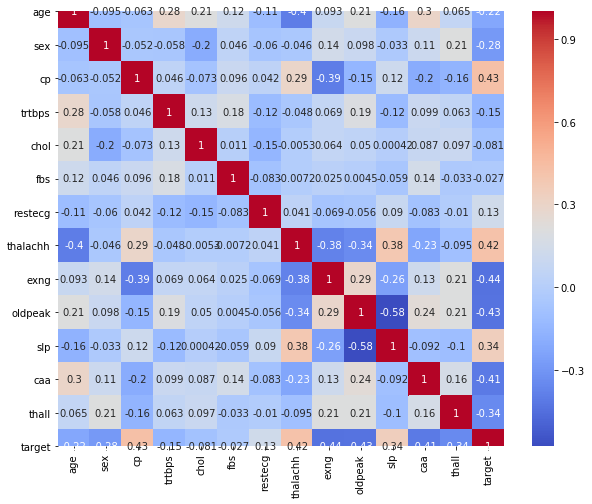

In [226]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

In [227]:
df.corr()['target'].sort_values()

exng       -0.435601
oldpeak    -0.429146
caa        -0.408992
thall      -0.343101
sex        -0.283609
age        -0.221476
trtbps     -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
slp         0.343940
thalachh    0.419955
cp          0.432080
target      1.000000
Name: target, dtype: float64

**Предварительная обработка данных**

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [228]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

**Разделим датасет на обучающие и тестовые данные**

In [229]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [230]:
print('Тренирововчные данные', x_train.shape, y_train.shape)
print('Тестовые данные', x_test.shape, y_test.shape)

Тренирововчные данные (241, 12) (241,)
Тестовые данные (61, 12) (61,)


In [231]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [232]:
x_train,x_test

(array([[-1.4186261 ,  0.98544689, -0.55988902, ..., -0.61492051,
         -0.70674006, -0.49876142],
        [-1.4186261 ,  0.98544689,  0.81698091, ..., -0.61492051,
          0.29516791, -0.49876142],
        [ 0.70490738,  0.98544689,  0.47276343, ...,  0.99590387,
         -0.70674006, -0.49876142],
        ...,
        [ 0.70490738,  1.94307874, -0.67462818, ..., -0.61492051,
         -0.70674006,  1.1478345 ],
        [ 0.70490738,  0.98544689,  0.35802427, ...,  0.99590387,
         -0.70674006, -0.49876142],
        [ 0.70490738,  0.98544689,  0.01380679, ...,  0.99590387,
          1.29707587,  1.1478345 ]]),
 array([[ 0.70490738,  0.02781503, -0.67462818,  0.65089023, -0.40527917,
         -0.97525383, -1.96657306, -0.6983225 ,  0.27236593, -0.61492051,
          0.29516791,  1.1478345 ],
        [ 0.70490738,  1.94307874,  2.19385084, -0.36856884, -0.40527917,
         -0.97525383,  0.23525787, -0.6983225 , -0.39657867, -0.61492051,
         -0.70674006,  1.1478345 ],
     

## Logestic Regression

In [233]:
model_LG = LogisticRegression()
model_LG.fit(x_train, y_train)
predicted_LG=model_LG.predict(x_test)

In [234]:
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted_LG)*100, "%")

The accuracy of Logistic Regression is :  88.52459016393442 %


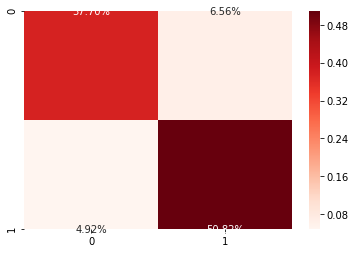

In [235]:
cm1 = confusion_matrix(y_test, predicted_LG)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

## Gaussian Naive Bayes

In [236]:
model_GNB = GaussianNB()
model_GNB.fit(x_train, y_train)
  
predicted_GNB = model_GNB.predict(x_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted_GNB)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  88.52459016393442 %


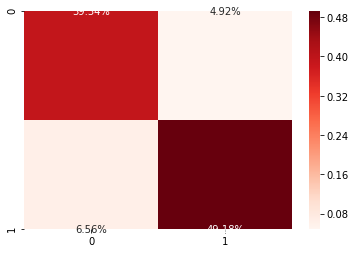

In [237]:
cm2 = confusion_matrix(y_test, predicted_GNB)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

## Random Forest

In [238]:
model_RF = RandomForestRegressor(n_estimators = 100, random_state = 0)  
model_RF.fit(x_train, y_train)  
predicted_RF = model_RF.predict(x_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted_RF.round())*100, "%")

The accuracy of Random Forest is :  85.24590163934425 %


## Support Vector Classification

In [239]:
model_SVC = SVC()
model_SVC.fit(x_train, y_train)

predicted_SVC = model_SVC.predict(x_test)

print("The accuracy of SVM is : ", accuracy_score(y_test, predicted_SVC)*100, "%")

The accuracy of SVM is :  91.80327868852459 %


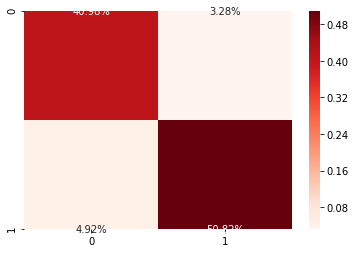

In [240]:
cm3 = confusion_matrix(y_test, predicted_SVC)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')

## Gradient Boosting

In [241]:
params = {
    'learning_rate': np.arange(0.05, 0.4, 0.05),
    'max_depth': np.arange(3, 10),
    'min_child_weight': np.arange(1, 7, 2),
    'gamma': np.arange(0.0, 0.5, 0.1),
}
XGB = xgboost.XGBClassifier()
perfect_params = RandomizedSearchCV(XGB, param_distributions=params, n_iter=6, n_jobs=-1, scoring='roc_auc')
perfect_params.fit(x, y)
perfect_params.best_params_

{'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.25, 'gamma': 0.4}

In [242]:
model_XGB = xgb.XGBClassifier(min_child_weight=5, max_depth=8, learning_rate=0.1, gamma=0.0, verbosity=0, use_label_encoder=False)
model_XGB.fit(x_train, y_train)
   
predicted_XGB = model_XGB.predict(x_test)

In [243]:
print ("The accuracy of Gradient Boosting is : ", accuracy_score(y_test, predicted_XGB)*100, "%")

The accuracy of Gradient Boosting is :  85.24590163934425 %


## Decison Tree

In [254]:
model_DTC=DecisionTreeClassifier()
model_DTC.fit(x_train,y_train)

predicted_DTC = model_DTC.predict(x_test)


print ("The accuracy of Decison Tree is : ", accuracy_score(y_test, predicted_DTC)*100, "%")

score = accuracy_score(y_test, predicted_DTC)*100

The accuracy of Decison Tree is :  80.32786885245902 %


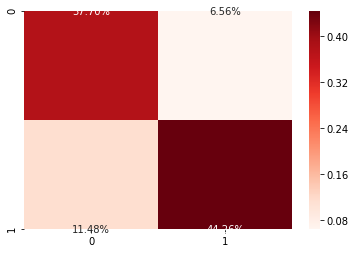

In [246]:
cm4 = confusion_matrix(y_test, predicted_DTC)
sns.heatmap(cm4/np.sum(cm4), annot = True, fmt=  '0.2%', cmap = 'Reds')

In [255]:
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted_LG)*100, "%")
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted_GNB)*100, "%")
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted_RF.round())*100, "%")
print("The accuracy of SVM is : ", accuracy_score(y_test, predicted_SVC)*100, "%")
print ("The accuracy of Gradient Boosting is : ", accuracy_score(y_test, predicted_XGB)*100, "%")
print ("The accuracy of Decison Tree is : ", accuracy_score(y_test, predicted_DTC)*100, "%")

The accuracy of Logistic Regression is :  88.52459016393442 %
The accuracy of Gaussian Naive Bayes model is :  88.52459016393442 %
The accuracy of Random Forest is :  85.24590163934425 %
The accuracy of SVM is :  91.80327868852459 %
The accuracy of Gradient Boosting is :  85.24590163934425 %
The accuracy of Decison Tree is :  80.32786885245902 %


##### наилучший результат для текущего датасета показала модель SVC. Следует учитывать, что размер и значения датасета будут увеличиваться и меняться. Также планируется использовать новые признаки для предсказаний. Исходя из этого следует проводить регулярный анализ данных и тестирование с использованием различных моделей данных.